<a href="https://colab.research.google.com/github/shreyajanaki/MACHINE-LEARNING-BLOG/blob/main/ML_project_individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training samples: 25000
Testing samples: 25000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 40s 238ms/step - accuracy: 0.6234 - loss: 0.6218 - val_accuracy: 0.8532 - val_loss: 0.3424
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 229ms/step - accuracy: 0.9023 - loss: 0.2438 - val_accuracy: 0.8632 - val_loss: 0.3242
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step - accuracy: 0.9579 - loss: 0.1311 - val_accuracy: 0.8584 - val_loss: 0.3869
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.8479 - loss: 0.4002

Test Accuracy: 0.8465999960899353


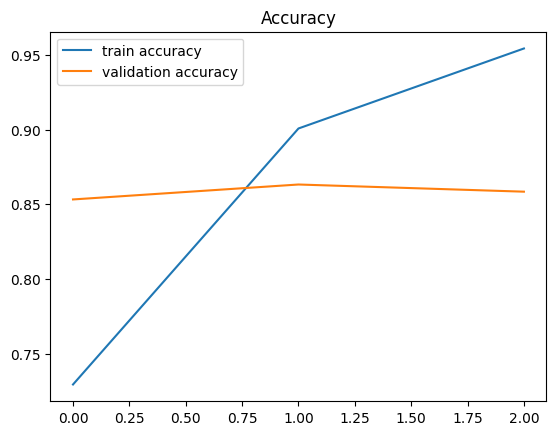

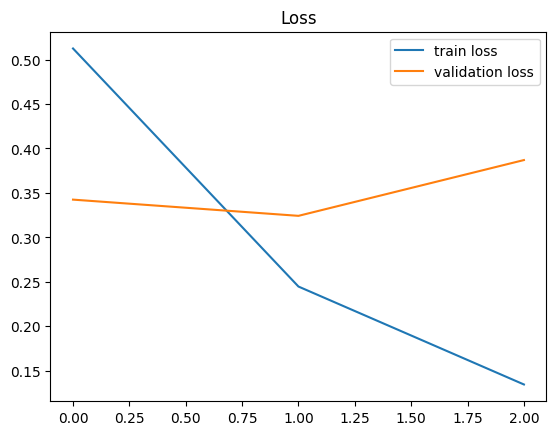


Prediction Samples:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
-> Positive 😀
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
-> Positive 😀


In [ ]:
# ✅ Import Libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Step 1: add CSV link
csv_url = "https://raw.githubusercontent.com/yourusername/yourrepo/main/data.csv"
# ✅ Load IMDB Dataset
max_features = 10000   # vocabulary size
max_len = 200          # max words per review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

print("Training samples:", len(x_train))
print("Testing samples:", len(x_test))

# ✅ Pad sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# ✅ Build CNN Model
model = Sequential([
    Embedding(max_features, 128, input_length=max_len),

    Conv1D(32, kernel_size=7, activation="relu"),
    MaxPooling1D(pool_size=3),

    Conv1D(64, kernel_size=7, activation="relu"),
    GlobalMaxPooling1D(),

    Dense(32, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

# ✅ Train
history = model.fit(
    x_train, y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.2
)

# ✅ Evaluate
loss, acc = model.evaluate(x_test, y_test)
print("\nTest Accuracy:", acc)

# ✅ Plot Accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()

# ✅ Plot Loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title("Loss")
plt.legend()
plt.show()

# ✅ Prediction on new sentence
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(["dummy"])

def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=max_len)
    pred = model.predict(padded)[0][0]
    return "Positive 😀" if pred > 0.5 else "Negative 😞"

print("\nPrediction Samples:")
print("->", predict_sentiment("I loved this movie, it was awesome!"))
print("->", predict_sentiment("This movie was boring and terrible."))
